In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [34]:
sales = pd.read_csv("data/shampoo_sales.csv")
sales.head()

,Month,Sales
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [35]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [36]:
sales.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


<Axes: >

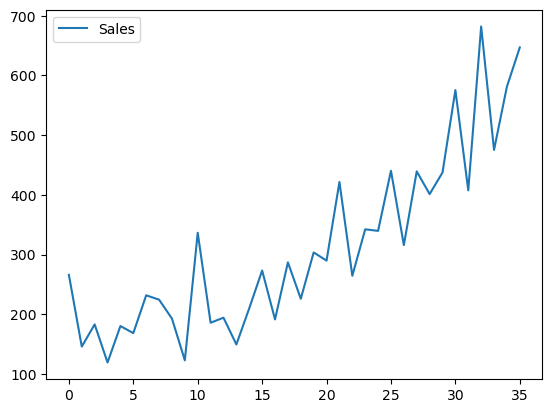

In [37]:
sales.plot()

This is time series data, but we can’t unlock its full potential until we convert it into a Pandas time series structure. Without proper time series indexing, we might miss out on valuable insights!

Let’s harness the power of time series indexing! This will allow us to perform time-based operations effortlessly, create accurate visualizations, and set the stage for effective forecasting models.

So, let’s convert our data into a Pandas time series format. We can easily achieve this using the to_datetime function on the "Month" column and setting it as the index.

In [38]:
sales['Month'] = pd.to_datetime(sales['Month'])
sales.set_index('Month', inplace=True)


In [39]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [40]:

df = pd.read_csv("data/shampoo_sales.csv", 
                  parse_dates=True, index_col=0)
df.head(36)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


After converting our sales data into a Pandas time series structure, let's take a look at the new format:

Notice the difference?

We now have a DatetimeIndex, which organizes our data chronologically, allowing us to perform time-based analyses effortlessl

In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


<Axes: xlabel='Month'>

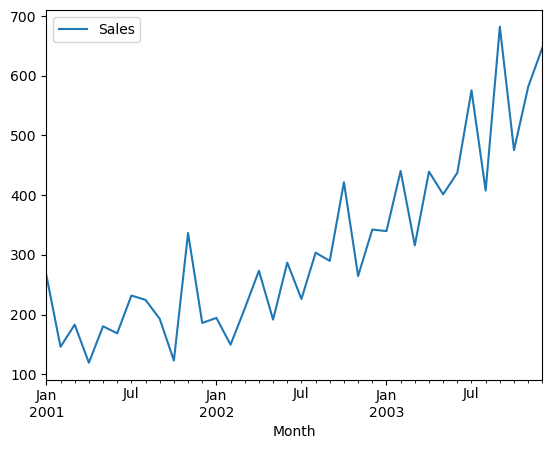

In [42]:
sales.plot()

Alternatively, we can directly load the data as a time series by using parse_dates=True and index_col when reading the data.

In [43]:
shampoo = pd.read_csv('data/shampoo_sales.csv', parse_dates=True, index_col='Month')

# So what kind of machine learning problem is time series forecasting

You might already be familiar with supervised machine learning problems, where our goal is to learn a function from labeled training data. Each training example consists of input data (features) and corresponding output labels (targets). For instance, predicting the price of a house based on features like location, age, and size.

Now, let’s explore a different but related problem: time series forecasting. This involves predicting future values based on current or past values. Think about forecasting shampoo sales figures based on previous sales data.

So, what kind of problem is time series forecasting? If you guessed it right, then yes—time series forecasting is considered a supervised learning problem! Great job!

So, how should we approach this time series problem? Shouldn't we follow the same steps as in any supervised learning approach? Yes, at a high level, we will:


However, as we drill down further, we need to keep in mind that the features we create are very temporal in nature. Visualization aims to identify relationships with past data, highlighting correlations with previous values.

While the models are fundamentally based on regression techniques, they also incorporate additional complexities, such as noise in the time data, relationships with previous values, and factors like seasonality.


## Can You Identify the Features and Target?

Of course, we have much to explore ahead! Let’s start by surfing through feature engineering with our little shampoo sales dataset. Together, we’ll create features specific to time series data and uncover what kind of insights they can provide.

In time series forecasting, let's break it down:

Output (Label): The goal is to predict future values of the time series. In our shampoo sales example, we want to forecast the sales for the next month based on the previous sales data.

Input (Features): We use historical observations or past values of the time series. For example, we might look at sales data from the past 12 months.





# Feature Engineering in Time Series Data

In its original form, time series data doesn't naturally have defined input and output features. To make predictions at future time steps, we must first decide which variable we want to forecast and apply feature engineering to create the necessary input features.
time 1, value 1
time 2, value 2
time 3, value 3

Here’s how we transform the dataset:
From a basic time series structure like this:


We reshape it into something like this:

input 1, output 1
input 2, output 2
input 3, output 3


This transformation enables us to train a supervised learning algorithm. In machine learning terms, these inputs are called features, and our task is to create new features from the original time series data.

Why Feature Engineering?
Beyond just reshaping, the goal of feature engineering is to create new features that improve model performance. We do this by analyzing the relationship between these newly created temporal features and the target variable.

Three Key Feature Categories in Time Series
Date Time Features
These represent components of each time step, like the year, month, or day of the week. For example, the day of the week can help identify patterns that repeat weekly.

Lag Features
These are past observations used as inputs to predict future outcomes. By incorporating values from previous time steps, we capture the dependency of future predictions on past data.

Window Features
These summarize past values over a fixed window of time, such as the average, minimum, or maximum of the past 3 months. This helps the model understand longer-term trends or seasonality.

By building these features, we enhance the predictive power of our model and improve the overall accuracy of our time series forecasts.

Let’s now dive into creating these features with our shampoo sales dataset and see how they can help us make better predictions!

<!-- # Setting Shampoo Sales Problem as Supervised Learning Problem
To restructure this time series data into a supervised learning problem, you can create a new dataset where the value of the current time step is the feature (input) and the value of the next time step is the target (output). This is often called a lag-based or autoregressive transformation.

Here’s how you can do this in Python using Pandas:

Create lagged features: Use the previous time step's value as a feature to predict the next time step’s value.
Remove missing values: The first observation won't have a "previous" value, so it will be removed. -->

In [44]:
shampoo

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


# Components of Time Series data

Looking at the graph, we can clearly see that there’s more happening here than just random fluctuations. Some clear patterns are emerging:

Upward Movement: There’s a general increase in the shampoo sales  over time. Repeating Peaks and Troughs: There seems to be a recurring pattern when sales  rise and fall. But what exactly are these patterns? Let's break them down into the components of a time series to understand them better

- Trend
- Seasonality
- Noise
  

We can visualize these components through a method called time series decomposition.For now we will not dive into the code but its outcome

In [46]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Decompose the time series
# decomposition = seasonal_decompose(shampoo['Sales'], model='multiplicative')

# # Plot the decomposition
# plt.figure(figsize=(12, 10))
# plt.subplot(411)
# plt.plot(df['Sales'], label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(decomposition.trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(decomposition.seasonal, label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(decomposition.resid, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [47]:
shampoo.head(36)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [48]:
shampoo.head(36)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [49]:
# Drop the last row, as it will have a NaN target value (no next time-step)
shampoo = shampoo.dropna()

In [50]:
#let's look at initial data
shampoo.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


Have a look at the new features of our transformed time series data from the perspective of supervised learning.

- New Features: We now have:

current_month_sale(m): Sales for the current month.
sale_previousmonth(m-1): Sales from the previous month.
sale_previousmonth(m-2): Sales from two months prior.
- Supervised Learning Setup: This structure allows us to use past sales as inputs (X) to predict current sales (y), framing our problem as a supervised learning task.

- Maintaining Temporal Order: It's crucial to keep the time sequence intact for accurate predictions.

- Data Cleanup: We have removed rows lacking previous values

The use of prior time steps to predict the next time step is called the sliding window method or also lag method. Here, lag refers to the delay between observations, where previous time steps (lags) are used to forecast future values. The number of previous time steps is called the window width or lag size.
This method transforms our time series data into  regression  supervised learning problems where we are predicting value of continuous variable sales.

Once prepared, any standard linear or nonlinear machine learning algorithms can be applied, provided the order of rows is preserved.
We can also increase the sliding window width to include more previous time steps, enriching the context for our predictions.

Types of Models Used in Time Series Analysis:

Linear Models: ARIMA, SARIMA (these predict future values based on past observations in a linear relationship).
Machine Learning Models: Decision Trees, Random Forests, or Neural Networks can also be used for forecasting by training them on sliding windows of past time series data.

Supervised Learning Steps in Time Series:

- Load Data and Convert To Time Series
- Data Cleanup (Missing Value /Frequency)
- Data Preparation for Modelling
-- Descriptive Statistics
-- Feature Engineering (Date Time Features, Lag Features, Window Size Features(Rolling Window Statistics))
-- Data Visualization
-- Resampling
-- Transformation
--

   

Train: The model is trained on historical data where both the inputs (past observations) and outputs (future values) are known.
Predict: Once trained, the model can predict future time points using unseen data (next steps in the series).

Types of Models:
Linear Models: ARIMA, SARIMA (these predict future values based on past observations in a linear relationship).
Machine Learning Models: Decision Trees, Random Forests, or Neural Networks can also be used for forecasting by training them on sliding windows of past time series data.

Key Differences from Traditional Supervised Learning:

Temporal Dependency: The order of data points matters. The model relies on the fact that data points are dependent on previous observations.
Autoregression: Often, the target variable (what you're trying to predict) is the same as one of the input variables, but shifted in time (past sales → future sales).

In [51]:
# Descriptive Statistics
shampoo.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


# Feature Engineering in Time Series Data

Let's load another time series dataset .


In [52]:
df=pd.read_csv("data/daily-minimum-temperatures-in-me.csv")
df.head()

,Date,MinTemp
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [53]:
temp = pd.read_csv("data/daily-minimum-temperatures-in-me.csv", 
                  parse_dates=['Date'], index_col='Date')
temp.head(20)

,MinTemp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [54]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


This data indicates daily min temperature  recorded for the city  of Melbourne.Here we have information of month , day and year corresponding to each record. y

Time series data needs to be reformatted into a supervised learning dataset before we can apply machine learning algorithms. as we can see , In its original form, time series data does not have defined input and output features. Instead, we must identify the variable we want to predict and utilize feature engineering to create all the input variables needed for making predictions at future time steps.

We transform the time series dataset from a format like this:

time 1, value 1
time 2, value 2
time 3, value 3

to a structure that resembles this:

input 1, output 1
input 2, output 2
input 3, output 3
                            
This reorganization allows us to train a supervised learning algorithm. In machine learning, input variables are often referred to as features, and our task is to develop new input features from the original time series dataset.

Apart from this shaping time series data through feature engineering , we also aim to create feature such as we get maximum performnace from model .This can be done by analyzing the relation between temporal features created and target variable


In this tutorial, we will explore three categories of features that can be derived from our time series dataset:

-- Date Time Features: These features represent components of the time step for each observation, such as year, month, day, or day of the week.

-- Lag Features: These features capture the values from previous time steps, allowing us to use past observations as inputs for predicting future outcomes.

-- Window Features: These features provide a summary of values over a fixed window of prior time steps, such as the average, minimum, or maximum values within a specified period.

By leveraging these feature types, we can enhance our model's predictive capabilities and improve our time series forecasting accuracy.

## Let's first create clear problem statement
Here let's form a problem statement -  predict the daily minimum temperature given the month and day

## Data Time Features
This calls for extracting month and day as the feature from existing information.Further to that we can form diffeerent features based on these date time values.We can extract these features using pandas day time stamp

In [55]:
temp['month']=pd.to_datetime(temp.index).month
temp['day']=pd.to_datetime(temp.index).day
temp

,MinTemp,month,day
Date,,,
1981-01-01,20.7,1,1
1981-01-02,17.9,1,2
1981-01-03,18.8,1,3
1981-01-04,14.6,1,4
1981-01-05,15.8,1,5
...,...,...,...
1990-12-27,14.0,12,27
1990-12-28,13.6,12,28
1990-12-29,13.5,12,29


With this informaation we can come up with analysis months have what kind of mean temperaature etc

## Lag Features
Now we already have hint about this from our discussion on shampoo dataset problem.Classic Time Series Forecasting models like ARIMA, make use of the values from current time stamp(called lag) to come up with forecasted value of next time stamp.Let's create a dataframe with lag features

In [56]:
temp = pd.read_csv("data/daily-minimum-temperatures-in-me.csv", 
                  parse_dates=['Date'], index_col='Date')
temp.head(20)

,MinTemp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [57]:
# Create current time stamp feature MinTemp(t)
temp['MinTemp(t)'] = temp['MinTemp']

# Create next time stamp feature MinTemp(t+1)
temp['MinTemp(t+1)'] = temp['MinTemp(t)'].shift(-1)
temp.tail()

,MinTemp,MinTemp(t),MinTemp(t+1)
Date,,,
1990-12-27,14.0,14.0,13.6
1990-12-28,13.6,13.6,13.5
1990-12-29,13.5,13.5,15.7
1990-12-30,15.7,15.7,13.0
1990-12-31,13.0,13.0,NaN


Understanding the Sliding Window Method
The addition of lag features is known as the sliding window method. In this context, we have a window width of 1, meaning we focus only on the immediate previous time step to make our predictions.

How It Works:
Think of it as sliding a window along the time series, where each observation captures information within this defined window.
By using just one previous value, we can create features that help us predict the current value effectively.
Expanding the Window Width:
We can also expand this window width to include more lagged features. This means we could consider not only the immediate previous value but also values from further back in time.
This approach allows us to capture more historical context, which can be crucial for improving the accuracy of our predictions.

In [58]:
#We can expand the window width and include more lagged features. 
# Create next time stamp feature MinTemp(t+1)
temp['MinTemp(t-2)'] = temp['MinTemp(t)'].shift(1)
temp['MinTemp(t-1)'] = temp['MinTemp(t)'].shift(1)
temp = temp[['MinTemp','MinTemp(t-2)', 'MinTemp(t-1)', 'MinTemp(t)', 'MinTemp(t+1)']]

temp.head()

,MinTemp,MinTemp(t-2),MinTemp(t-1),MinTemp(t),MinTemp(t+1)
Date,,,,,
1981-01-01,20.7,NaN,NaN,20.7,17.9
1981-01-02,17.9,20.7,20.7,17.9,18.8
1981-01-03,18.8,17.9,17.9,18.8,14.6
1981-01-04,14.6,18.8,18.8,14.6,15.8
1981-01-05,15.8,14.6,14.6,15.8,15.8


In [59]:
temp.tail()

,MinTemp,MinTemp(t-2),MinTemp(t-1),MinTemp(t),MinTemp(t+1)
Date,,,,,
1990-12-27,14.0,14.6,14.6,14.0,13.6
1990-12-28,13.6,14.0,14.0,13.6,13.5
1990-12-29,13.5,13.6,13.6,13.5,15.7
1990-12-30,15.7,13.5,13.5,15.7,13.0
1990-12-31,13.0,15.7,15.7,13.0,NaN


we must discard the first few rows and a last row that do not have enough data to  
train a supervised mode

l

In [60]:
temp.dropna(inplace=True)
temp.head()

,MinTemp,MinTemp(t-2),MinTemp(t-1),MinTemp(t),MinTemp(t+1)
Date,,,,,
1981-01-02,17.9,20.7,20.7,17.9,18.8
1981-01-03,18.8,17.9,17.9,18.8,14.6
1981-01-04,14.6,18.8,18.8,14.6,15.8
1981-01-05,15.8,14.6,14.6,15.8,15.8
1981-01-06,15.8,15.8,15.8,15.8,15.8


# Rolling Window Statistics

Currently, we are using a linear sliding window. However, there may be instances where we want to incorporate weekly, monthly, or even annual lags. 

Going Beyond Raw Lags: Adding Summary Statistics

A step beyond adding raw lagged values is to summarize the values from previous time steps. One of the most useful features to create is the rolling mean, which smooths out fluctuations and captures trends across time. By calculating the average of values within a sliding window, we can use this summary to predict future values.

For instance, in the case of temperature data, after collecting two days' worth of values, we can compute the mean and use it to predict the temperature for the following day. This method allows us to smooth the data and derive insights from trends over time.

Pandas provides a built-in function, rolling(), that lets us create a rolling dataset and perform statistical functions, such as calculating the mean, across a defined window of time steps. First, the series must be shifted to align the data correctly. Once the rolling window is created, we can calculate summary statistics like mean, median, or even standard deviation.

For example, here are the first few rolling windows for our temperature data:

Day 1-2: Mean of values from days 1 and 2
Day 2-3: Mean of values from days 2 and 3
This rolling mean can smooth out daily variations and improve the predictive power of our model by capturing broader trends. In the next section, we will apply this rolling window method to our dataset and explore how it enhances our predictions.

In [61]:
# Applying rolling window mean (rolling mean of previous 2 values including current value)
temp['Rolling_Mean(t-2_to_t)'] = temp[['MinTemp(t-2)', 'MinTemp(t-1)', 'MinTemp']].mean(axis=1)

# Display the result\
temp[['MinTemp', 'MinTemp(t-2)', 'MinTemp(t-1)', 'MinTemp(t)', 'MinTemp(t+1)', 'Rolling_Mean(t-2_to_t)']].head()

,MinTemp,MinTemp(t-2),MinTemp(t-1),MinTemp(t),MinTemp(t+1),Rolling_Mean(t-2_to_t)
Date,,,,,,
1981-01-02,17.9,20.7,20.7,17.9,18.8,19.766667
1981-01-03,18.8,17.9,17.9,18.8,14.6,18.200000
1981-01-04,14.6,18.8,18.8,14.6,15.8,17.400000
1981-01-05,15.8,14.6,14.6,15.8,15.8,15.000000
1981-01-06,15.8,15.8,15.8,15.8,15.8,15.800000


In [62]:
# temp['MinTemp'].plot()
# temp['Rolling_Mean(t-2_to_t)'].plot(alpha=0.95)

# Data Visualization
Now that we’ve explored feature engineering—creating lag features and sliding windows—it’s time to level up our time series analysis with visualization. Why? Because understanding the patterns and relationships within your data can lead to more informed feature selection and better forecasting models.

- Line plots, lag plots, and autocorrelation plots help you uncover trends, seasonality, and relationships between past and present values.
- Histograms and density plots allow you to analyze the distribution of your data, revealing the shape and spread of observations.
- Box plots and heat maps help you detect changes in distribution across time, highlighting shifts and variability over intervals.
Visualization is key to preparing your data for time series forecasting. This will take us one step closer to forecasting! Let's get started!

## Line Plot

In [63]:
temp = pd.read_csv("data/daily-minimum-temperatures-in-me.csv", 
                  parse_dates=['Date'], index_col='Date')
temp.head(20)

,MinTemp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [64]:
We have alreay seen how a line plot looks like

SyntaxError: invalid syntax (2299286082.py, line 1)

In [ ]:
temp.plot()
# series.plot(style='k.')


We can create line plot for individual year data and perform comparison for temperature each year for 365 days
To compare temperature trends across different years, we can create a line plot for individual year data, showing the daily temperature for each of the 365 days. This visual comparison will help identify yearly patterns, fluctuations, and anomalies in temperature trends.

Here’s how you can approach it:

Group the data by year to isolate the temperature values for each year.
Create a line plot for each year, ensuring all plots are overlaid for comparison.
Analyze how temperatures change day by day across different years, helping identify seasonal patterns or anomalies.

In [ ]:
# Extract the year from the date and create a new column 'Year'
temp['Year'] = temp.index.year

# Extract the day of the year to create a common x-axis for comparison
temp['DayOfYear'] = temp.index.dayofyear

# Group the data by 'Year'
grouped = temp.groupby('Year')

num_years = grouped.ngroups  # Number of years in the dataset
fig, axes = plt.subplots(num_years, 1, figsize=(8, 2 * num_years), sharex=True)

colors = plt.cm.viridis(np.linspace(0, 1, num_years))  # Color map for different colors

for ax, (year, group), color in zip(axes, grouped, colors):
    ax.plot(group['DayOfYear'], group['MinTemp'], color=color, label=str(year))
    ax.set_title(f'Temperature for {year}', fontsize=10)
    ax.set_ylabel('MinTemp', fontsize=8)
    ax.legend(fontsize=8)

plt.xlabel('Day of Year', fontsize=10)
plt.tight_layout()
plt.show()

# Histogram and Density Plots

Visualizing the distribution of our observations is a crucial step in time series analysis. By examining the values without considering their temporal order, we can gain insights into the underlying characteristics of our data.

Many linear forecasting methods assume that the data follows a normal distribution, often depicted as a bell curve. While statistical tests can confirm this assumption, visualizations like histograms offer a practical first look at the distribution of both raw and transformed data.

Let’s create a histogram of the Minimum Daily Temperatures dataset to explore this distribution. A histogram groups values into bins, allowing us to see the frequency or count of observations in each bin. This visualization helps us understand how our data is structured and can inform our forecasting approach.

In [ ]:

# Assuming 'temp' DataFrame with 'MinTemp' column already exists

# Create a histogram of the 'MinTemp' values
plt.figure(figsize=(10, 6))
sns.histplot(temp['MinTemp'], bins=20, color='blue', edgecolor='black', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Minimum Daily Temperatures', fontsize=14)
plt.xlabel('Minimum Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Box and Whisker Plots by Interval

While histograms and density plots give us a snapshot of the overall distribution of our observations, we might want to dive deeper and explore how the distribution changes over specific time intervals. This is where box and whisker plots come into play.

A box and whisker plot visually summarizes the distribution of a dataset by highlighting key statistical measures:

Box: The box itself represents the interquartile range (IQR), capturing the middle 50% of observations (from the 25th to the 75th percentile).
Median Line: A line within the box marks the 50th percentile, or median, providing insight into the central tendency of the data.
Whiskers: Lines (or "whiskers") extend from the box to show the range of the data, with dots indicating outliers that fall outside this range.
By grouping our data by specific time intervals, such as years, months, or days, we can create side-by-side box and whisker plots for easy comparison.

In [ ]:
# Create box and whisker plots for each year
plt.figure(figsize=(12, 6))
temp.boxplot(column='MinTemp', by='Year', grid=False, fontsize=10)
plt.title('Box and Whisker Plot of Minimum Daily Temperatures by Year', fontsize=14)
plt.suptitle('')  # Remove the default title to keep it clean
plt.xlabel('Year', fontsize=12)
plt.ylabel('Minimum Temperature', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Comparative Analysis: Each box and whisker plot allows you to compare the temperature distributions across different years, helping identify trends or anomalies.
Visual Summary: This visualization succinctly captures variations, central tendencies, and outliers in the temperature data, offering a comprehensive view at a glance.

# Exploring Lag Scatter Plots
As we dive deeper into our time series data, Lag Scatter Plots become essential tools for spotting relationships between values over time.

What’s a Lag Scatter Plot?
It shows how today’s value compares to its past values. For instance, plotting today’s temperature against yesterday’s helps us see if there's a correlation.

Let’s Create a Lag Scatter Plot!

In [ ]:
import matplotlib.pyplot as plt

# # Create a lagged feature for MinTemp
# temp['MinTemp(t-1)'] = temp['MinTemp'].shift(1)

# # Drop NaN values
# lagged_data = temp.dropna(subset=['MinTemp(t-1)'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(temp['MinTemp(t-1)'], temp['MinTemp(t)'], alpha=0.6)
plt.title('Lag Scatter Plot: Current vs. Previous Day Temperature')
plt.xlabel('MinTemp(t-1)')
plt.ylabel('MinTemp(t)')
plt.grid()
plt.show()

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(temp['MinTemp(t-2)'], temp['MinTemp(t)'], alpha=0.6)
plt.title('Lag Scatter Plot: Current vs. Previous 2 Day Temperature')
plt.xlabel('MinTemp(t-2)')
plt.ylabel('MinTemp(t)')
plt.grid()
plt.show()

Now that we've seen relationships through Lag Scatter Plots, let’s uncover deeper insights with Autocorrelation.

What is Autocorrelation?
It measures how values relate to their past values over various lags, highlighting trends and patterns.

Visualizing with Autocorrelation Plots
To visualize autocorrelation, we’ll use Autocorrelation Plots, which show the correlation coefficients for different lags.

In our Lag Scatter Plot, the arrangement of points tells a story about the relationship between current and past values:

Tighter to the Diagonal Line: Indicates a strong predictive relationship between today’s temperature and yesterday's.
Spread from the Line: Suggests a weaker relationship, where past values don't consistently predict current values.
Ball in the Middle: Implies a weak or no relationship, meaning past temperatures aren't helpful for today's predictions.

In [ ]:
import numpy as np


# Generate completely noisy data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
values = np.random.normal(loc=0, scale=1, size=len(dates))

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True)

# Plot the noisy data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Value'], alpha=0.6)
plt.title('Completely Noisy Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# AutoCorrelation Plots
We can measure the strength and nature of relationships between observations and their lags through autocorrelation (self-correlation). This involves calculating correlation values between current observations and their lagged values, resulting in a number between -1 and 1:

Positive Correlation (closer to 1): Indicates a strong relationship, meaning past values predict current values well.
Negative Correlation (closer to -1): Suggests an inverse relationship.
Weak Correlation (around 0): Indicates little to no predictive power from past values.
These correlation values, or correlation coefficients, can be computed for different lags. By visualizing these values in an autocorrelation plot, we gain insights into how relationships evolve over time.

Using Pandas, we can easily generate an autocorrelation plot for our dataset, such as the Minimum Daily Temperatures. This plot helps us identify significant lags that could enhance our forecasting models!

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# Create the autocorrelation plot
plt.figure(figsize=(10, 1500))
plot_acf(temp['MinTemp'], lags=300)
plt.title('Autocorrelation Plot for Minimum Daily Temperatures')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(temp['MinTemp'])
plt.show()


In [ ]:
# year = '1983'
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Assuming df is already loaded and indexed by 'Date'
# # Example: Filter data for the year 1983
# year = '1983'
# df_year = df.loc[df.index.year == int(year)]

# # Plot the MinTemp for the selected year
# plt.figure(figsize=(12, 6))
# plt.plot(df_year.index, df_year['MinTemp'], linestyle='-', color='b', label=f'MinTemp {year}')

# # Set the title and labels
# plt.title(f'Daily Minimum Temperatures in {year}')
# plt.xlabel('Date')
# plt.ylabel('MinTemp (°C)')

# # Set major ticks format to show all months
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format x-axis with month names

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Display grid
# plt.grid(True)

# # Add a legend
# plt.legend()

# # Adjust layout for better display
# plt.tight_layout()

# # Show the plot
# plt.show()

In [ ]:
# year = '1987'
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Assuming df is already loaded and indexed by 'Date'
# # Example: Filter data for the year 1983
# year = '1987'
# df_year = df.loc[df.index.year == int(year)]

# # Plot the MinTemp for the selected year
# plt.figure(figsize=(12, 6))
# plt.plot(df_year.index, df_year['MinTemp'], linestyle='-', color='b', label=f'MinTemp {year}')

# # Set the title and labels
# plt.title(f'Daily Minimum Temperatures in {year}')
# plt.xlabel('Date')
# plt.ylabel('MinTemp (°C)')

# # Set major ticks format to show all months
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for each month
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format x-axis with month names

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Display grid
# plt.grid(True)

# # Add a legend
# plt.legend()

# # Adjust layout for better display
# plt.tight_layout()

# # Show the plot
# plt.show()

In [ ]:
What is time series forecasting

time series forecasting is essentially a supervised learning problem.let's see what is a target variable and feature/ features over here

# Let's Visualize this Data

In [ ]:
# df.plot()

In [ ]:
# df.info()

# Components of Time Series data

Looking at the graph, we can clearly see that there’s more happening here than just random fluctuations. Some clear patterns are emerging:

Upward Movement: There’s a general increase in the number oproduction risers over time.
Repeating Peaks and Troughs: There seems to be a recurring pattern wheproductionger numbers rise and fall.
But what exactly are these patterns? Let's break them down into the components of a time series to understand them better

We can visualize these components through a method called time series decomposition.For now we will not dive into the code but its outcome

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Value'], model='multiplicative')

# Plot the decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Trend

The trend represents the long-term direction in the data. Is it moving upwards, downwards, or staying relatively flat?

<ppt here>- 
Uptrend: When the data shows a consistent increase over time, like the risingelectricity production over the yearss
-  Downtrend: When there is a steady decrease over time.
-  Stationary or Horizontal Trend: When there’s no apparent upward or downward movement.

## Seasonality

Seasonality refers to repeating patterns or cycles in the data that occur at regular intervals—like daily, monthly, or yearly.
For instance, in ourelectricity productionr data, we can see that theproductions tends to increase during certain monthw which might be due to change in weather every year
Another example of seasaonality can be increase in sale over weekend or increase in sale of certain products on every christmas.

## Residual

We will talk about this element in sometime

# Let's make a forecast for test data based on train data values

Even before applying any complex model, let's have a look at very raw approach of forecasting values.

Let's say if we know what was the average value of electricity production in a given month over the years, may be we can come up with forecasted value


Before Arriving at modelling at ARIMA , let's use raw approach 

# Auto Regressive Model Approach

We’re already familiar with regression, but let’s quickly revisit it before diving into auto regression for time series.
## Regression Model
A regression model, like linear regression, helps us predict an outcome based on input values.

For example:

yhat = b0 + b1*X1

Where yhat is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an inpriable(also called feature)

## Auto Regression  in Time Series 

Auto regression is a special kind of regression used for time series data. Instead of using different variables, it uses previous observations of the same variable to make predictions.

X(t+1) = b0 + b1*X(t-1) + b2*X(t-2)

In auto regression, the model uses past data points of the same variable to forecast future values, hence the term "auto" which means self-regression.


Before we talk about auto correlation let's have a look at this plot

In [ ]:
import numpy as np


# Generate completely noisy data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
values = np.random.normal(loc=0, scale=1, size=len(dates))

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True)

# Plot the noisy data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Value'], alpha=0.6)
plt.title('Completely Noisy Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

This is an example of Completely Random Data: 
This type of data has no discernible pattern or trend. The values are purely random, and any fluctuations or changes in the data are not predictable or explainable.

Example: rolling a die multiple times. Each roll is independent, and the results (numbers 1 through 6) are random and don't follow a pattern.

# Partially Noisy Data 
 The data which we saw for electricity production data shows some patterns or trends, but is also mixed with random fluctuations or noise. The noise can obscure the underlying trend or seasonal pattern, making it harder to identify and model.

Example: Monthly sales data for a store might show an overall upward trend due to business growth, but with irregular spikes or drops due to special events, holidays, or other random factors.

Residual or Noise is one component of time series data which we also observed when we did time series decomposition of electricity production data. Random fluctuations or outliers (e.g., sudden drop in sales due to unexpected store closure) that are not part of the trend or seasonality.

Noise:

What It Is: Noise is like random, unexpected fluctuations in your data. Think of it as background chatter that doesn’t follow any pattern.
Example: Imagine sudden, unexpected spikes in electricity usage due to a power surge. These spikes are random and don’t repeat in any predictable way.

You should not be confusing with another element of time series
Cyclicity:

What It Is: Cyclicity is when data shows regular but not fixed patterns over time. These patterns repeat, but the timing and strength can vary.
Example: Stock prices might go up and down in cycles based on economic conditions. These cycles happen regularly but aren’t exactly the same each time.
Key Difference:
Noise is random and hard to predict.
Cyclicity is more structured and repeats over time.

# Correlation
From the understanding of regression models, we are aware about concept of correlation.

In simple terms, correlation is a way to measure how two things are related. It tells us if changes in one thing are linked to changes in another.

If two things move in the same direction (when one goes up, the other also goes up), it's called positive correlation.
If they move in opposite directions (when one goes up, the other goes down), it's called negative correlation.
If there's no clear link between the two, it's called no correlation.
Example: If the temperature goes up and ice cream sales also go up, they have a positive correlation. But if the temperature goes up and the number of winter coat sales goes down, they have a negative correlation.

# Autocorrelation

Autocorrelation is when we check how a time series is related to its own past values. It's called autocorrelation because we're comparing the data to itself from previous time steps. In time series, this is also called serial correlation since the data comes in a sequence, where each point is linked to the ones before and after.

In an autoregression (AR) model, we use autocorrelation to predict future values. We look at how much today’s value depends on values from previous days, weeks, or months, known as lags. The stronger the relationship between today’s value and a past value, the more that past value helps us predict the future.

If past values don’t show any strong relationship with current values, it might mean the data is too random to make good predictions.

For example, if today’s electricity usage is similar to what it was a week ago, we can use that to forecast future usage. But if there’s no pattern, predicting becomes harder.

In [ ]:
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 8))
lag_plot(df['Value'], lag=1)  # Specify lag=7 for last 7 days lag
plt.title('Lag Plot with 1-Day Lag')
plt.show()

In [ ]:
# Shift the 'Value' column by -1 to create a lag of 1 day
df['Lag_Value'] = df['Value'].shift(-1)

# Drop any NaN values resulting from the shift
df_clean = df.dropna()

# Calculate the Pearson correlation coefficient
pearson_corr = df_clean['Value'].corr(df_clean['Lag_Value'])

print(f'Pearson Correlation Coefficient between current and 1-day lagged values: {pearson_corr}')

# Shift the 'Value' column by -1 to create a lag of 1 day
df['Lag_Value'] = df['Value'].shift(-6)

# Drop any NaN values resulting from the shift
df_clean = df.dropna()

# Calculate the Pearson correlation coefficient
pearson_corr = df_clean['Value'].corr(df_clean['Lag_Value'])

print(f'Pearson Correlation Coefficient between current and 7-day lagged values: {pearson_corr}')

# Auto Correlation Plots

Manually calculating correlations for each lag can be tedious. That’s where autocorrelation plots come in handy—they make it simple to see how past values in your data relate to current ones.

An autocorrelation plot helps you visualize how much the current value in a time series is influenced by its past values at different time lags.

Why Use Them?
Instead of calculating the correlation for each lag manually, an autocorrelation plot shows you all the lags at once, making it easier to spot patterns like trends or seasonality in your data.

Example:
Here’s how to create an autocorrelation plot in Python:

In [ ]:
df.head()

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Value'])


In [ ]:
df2= pd.read_csv("data/daily-minimum-temperatures-in-me.csv", parse_dates=True, index_col='Date')
df2.head()

In [ ]:
autocorrelation_plot(df2['MinTemp'])

Imagine you’re tracking the daily temperature in a city. The temperature on a particular day can be influenced by the temperature from the previous days. By examining autocorrelation, you can see if today's temperature is related to the temperature from a week ago or just from yesterday.

# ACF and PACF Plots from stats model library
Recall that an autocorrelation plot helps us understand how the electricity production at one time point relates to its past values. The values on the plot swing between -1 and 1, showing the strength of the correlation between the current value and values from previous time points.

Real-Life Example
Imagine you’re tracking electricity production in a city. The production today might be influenced by production levels from the previous days. For instance, if electricity production is higher on weekends, it might be influenced by the weekend pattern of previous years.

# ACF PLot

This plot shows how today’s electricity production is correlated with past values at various lags. For example, it can reveal if today’s production is related to the production 1 day ago, 7 days ago, or even 30 days ago.

In [ ]:
df2.head()

In [ ]:
df.head()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Value'], lags=10, ax=plt.gca())
plt.title('ACF Plot')
plt.show()

In [ ]:
plot_acf(df2['MinTemp'], lags=400, ax=plt.gca())


# PACF
PACF (Partial AutoCorrelation Function) Plot: This plot helps isolate the correlation between today’s electricity production and specific past values while removing the influence of values in between. It’s useful to see the direct relationship between today’s production and specific lags, such as 7 days ago, without considering intermediate days.

In [ ]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Value'], lags=30, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

Great, now that we have a grasp of autocorrelation and partial autocorrelation, we can use these insights to build an autoregressive (AR) model for forecasting. Here's a step-by-step guide on how you might proceed:

## Step 1: Define the Lag Order
Based on the ACF and PACF plots, decide how many lag values to include in your AR model. For example, here the PACF plot shows a significant spike at lag 6, you might choose an AR(6) model.

## Step 2: Fit the AR Model
Use the statsmodels library to fit the AR model to your data.

# Let's split the data in Time Series Data

<!-- Generally, in machine learning, you have a training set which you fit your model on, and a test set, which you will test your predictions against. Time series forecasting is just the same. Our train-test split will be different however. We use the past values to make future predictions, and so we will need to split the data in time. We train on the data earlier in the time series and test on the data that comes later. We can split time series at a given date as shown above using the DataFrame's dot-loc method. -->

In [ ]:
# # Split the data into a train and test set
# df_train = df.loc['2010':'2014']
# df_test = df.loc['2014':]

# # Create an axis
# fig, ax = plt.subplots()

# # Plot the train and test sets on the axis ax
# df_train.plot(ax=ax,label='Train')
# df_test.plot(ax=ax,label='Test')
# plt.title("Train-Test Split")
# plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


# Create a lagged dataset
values = pd.DataFrame(df['Value'])
lagged_values = pd.concat([values.shift(1), values], axis=1)

lagged_values.columns = ['Lagged', 'Current']
lagged_values.head()

In [ ]:
lagged_values.tail()

In [ ]:
lagged_values.info()

In [ ]:
len(lagged_values)

In [ ]:
# lagged_values = lagged_values.dropna()

# # Split the data into training and testing sets
# train_size = len(lagged_values) - 7
# train, test = lagged_values[:train_size], lagged_values[train_size:]
# train_X, train_y = train['Lagged'], train['Current']
# test_X, test_y = test['Lagged'], test['Current']


In [ ]:
# # Define the persistence model
# def persistence_model(x):
#     """Return the same value as the input."""
#     return x

# # Make predictions using the persistence model
# predictions = test_X.apply(persistence_model)

# # Calculate Mean Squared Error manually
# mse = np.mean((test_y - predictions) ** 2)
# print(f'Baseline - Test MSE: {mse:.3f}')

# # Plot the actual vs predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(test_y.values, label='Actual', color='blue')
# plt.plot(predictions.values, label='Predicted', color='red')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()

This is Persistence Model which  is a very basic forecasting approach where the model simply assumes that the future value will be the same as the most recent observed value. In other words, the prediction for the next time step is the last observed value in the series.Now let's talk about auto regressive modelling.Simple and often less accurate for complex patterns.

# AutoReg Model: 
This is a more sophisticated approach where the model learns from past values in the time series to predict future values. It uses multiple past observations (lags) to make predictions, and the number of lags is specified as a parameter.Let's see with example

In [ ]:
# # Fill missing values, if applicable
# df = df.fillna(method='ffill')  # Forward fill
# # or
# df = df.fillna(method='bfill')  # Backward fill

In [ ]:
# df = df.asfreq('ME')  # Set frequency to daily if not already
# freq = df.index.freq
# print(f'Frequency: {freq}')

In [ ]:

# # Extract values
# X = df['Value']

# # Split dataset
# train_size = len(X) - 7
# print(train_size)


In [ ]:
# train.head()

In [ ]:
# train, test = X[:train_size], X[train_size:]

# # Check the data after slicing
# print("Train data:")
# print(train.head())
# print("Test data:")
# print(test.head())

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
# # split dataset
# X = df.Value
# train, test = X[1:len(X)-7], X[len(X)-7:]


In [ ]:

# Split dataset
X = df['Value']
train_size = len(X) - 7
train, test = X[:train_size], X[train_size:]

# Train autoregression model
model = AutoReg(train, lags=6)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Convert predictions to Series with same index as test
predictions = pd.Series(predictions, index=test.index)

# Print predictions vs expected values
for date, pred, actual in zip(test.index, predictions, test):
    print(f'{date}: Predicted={pred:.2f}, Expected={actual:.2f}')

# Calculate and print RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## Key Points:

Learning-Based: The AutoReg model learns from past data using multiple lags.

Flexibility: It can incorporate more complex patterns and relationships in the data.

Lag Selection: The number of lags (e.g., 29 in this case) can significantly affect the model’s performance.

Uses multiple past observations (lags) to predict future values.
Learns from historical data and can capture more complex patterns.

Let's move to another basic model called moving average.But before we do that , I would suggest you to follow steps on my medium blog to practice AR modelling for predicting<>.Do not forget to give clap if you benefit out of it.

# Moving Average Modelling

In simple terms, the "moving average" model (MA) in time series analysis uses errors from previous time steps to predict future values. But what exactly are errors here?

Imagine you are trying to predict the temperature each day using past data. You make a prediction for Monday, but the actual temperature is slightly different from what you predicted. That difference is the error. It tells you how far off your prediction was from reality.

Now, let's say you want to predict the temperature for Tuesday. In a moving average model, you don't just rely on past temperature values; you also look at the errors from previous days (like the one from Monday). The idea is that the errors hold useful information that can help improve future predictions. For example, if you consistently overestimated the temperature, you might adjust your next prediction downward to be more accurate.

Layman example:

You’re a student predicting how much time you’ll need to finish homework each day. On Monday, you predicted it would take 1 hour, but it actually took 1.5 hours. The error is 0.5 hours (the difference between your guess and reality).

For Tuesday’s prediction, you consider Monday’s error, thinking, "I underestimated by 0.5 hours yesterday, so I'll add some time to today’s prediction." The error from Monday helps you make a better guess for Tuesday.

In a moving average model, these kinds of adjustments (using errors from previous days) help you improve your predictions.

Let's pick another dataset with no clear trend

# Data Transformation

In [ ]:

passenger = pd.read_csv("data/AirPassengers.csv", 
                  parse_dates=['Month'], index_col='Month')
passenger.head(36)

In [ ]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(passenger)
# histogram
plt.subplot(212)
plt.hist(passenger)
plt.show()


Let’s start by looking at the linear plot and histogram of the air passenger data to get a feel for its structure.

From the line plot, we can observe an upward trend, indicating that the number of passengers is increasing over time. The histogram shows the distribution of passenger counts, and it might not follow a typical bell-shaped curve, which can signal that the data is not evenly distributed.

Now, this brings us to an important concept in time series analysis: stationarity.

Stationary data has constant mean and variance over time, meaning that it doesn’t exhibit major shifts or trends. Models like ARIMA thrive on stationary data because it’s easier to predict stable, repeating patterns.

Non-stationary data, on the other hand, has changing mean and variance, as seen in our air passenger dataset. This is evident from the clear trend and increasing seasonality, where the peaks and valleys of each cycle become more pronounced over time.

Non-stationary data makes it difficult for models to capture reliable patterns, so the next step is to explore ways to transform it into a stationary form. Let's dive deeper into stationarity and how to handle non-stationary data for better forecasting results!

